# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [5]:
df_raw.shape

(400, 4)

Answer: 400

#### Question 2. Create a summary table

In [9]:
df_raw.describe()

admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The minimum, maximum and mean values are all much bigger. 

#### Question 4. Drop data points with missing data


In [10]:
df_raw.dropna()

admit    gre   gpa  prestige
0        0  380.0  3.61       3.0
1        1  660.0  3.67       3.0
2        1  800.0  4.00       1.0
3        1  640.0  3.19       4.0
4        0  520.0  2.93       4.0
5        1  760.0  3.00       2.0
6        1  560.0  2.98       1.0
7        0  400.0  3.08       2.0
8        1  540.0  3.39       3.0
9        0  700.0  3.92       2.0
10       0  800.0  4.00       4.0
11       0  440.0  3.22       1.0
12       1  760.0  4.00       1.0
13       0  700.0  3.08       2.0
14       1  700.0  4.00       1.0
15       0  480.0  3.44       3.0
16       0  780.0  3.87       4.0
17       0  360.0  2.56       3.0
18       0  800.0  3.75       2.0
19       1  540.0  3.81       1.0
20       0  500.0  3.17       3.0
21       1  660.0  3.63       2.0
22       0  600.0  2.82       4.0
23       0  680.0  3.19       4.0
24       1  760.0  3.35       2.0
25       1  800.0  3.66       1.0
26       1  620.0  3.61       1.0
27       1  520.0  3.74       4.0
28       1  780.0  3.22       2.0
29       0  520.0  3.29       1.0
..     ...    ...   ...       ...
370      1  540.0  3.77       2.0
371      1  680.0  3.76       3.0
372      1  680.0  2.42       1.0
373      1  620.0  3.37       1.0
374      0  560.0  3.78       2.0
375      0  560.0  3.49       4.0
376      0  620.0  3.63       2.0
377      1  800.0  4.00       2.0
378      0  640.0  3.12       3.0
379      0  540.0  2.70       2.0
380      0  700.0  3.65       2.0
381      1  540.0  3.49       2.0
382      0  540.0  3.51       2.0
383      0  660.0  4.00       1.0
384      1  480.0  2.62       2.0
385      0  420.0  3.02       1.0
386      1  740.0  3.86       2.0
387      0  580.0  3.36       2.0
388      0  640.0  3.17       2.0
389      0  640.0  3.51       2.0
390      1  800.0  3.05       2.0
391      1  660.0  3.88       2.0
392      1  600.0  3.38       3.0
393      1  620.0  3.75       2.0
394      1  460.0  3.99       3.0
395      0  620.0  4.00       2.0
396      0  560.0  3.04       3.0
397      0  460.0  2.63       2.0
398      0  700.0  3.65       2.0
399      0  600.0  3.89       3.0

[397 rows x 4 columns]

In [11]:
#if you drop data above, shouldn't the descriptive stats be different?
df_raw.describe()

admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000

In [12]:
print df_raw['admit'].isnull().sum()


0


In [13]:
# shouldn't this say 0 since I dropped values previously?
print df_raw['gre'].isnull().sum()

2


In [37]:
print df_raw['gpa'].isnull().sum()
print len(df_raw) - len(df_raw['gpa'].dropna())

2
2


In [38]:
print df_raw['prestige'].isnull().sum()
print len(df_raw) - len(df_raw['prestige'].dropna())

1
1


In [39]:
#shouldn't the shape be different after dropping values?
df_raw.shape

(400, 4)

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: 

#### Question 6. Create box plots for GRE and GPA

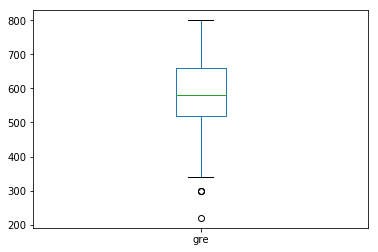

In [15]:
#boxplot 1
df_raw['gre'].plot(kind="box")

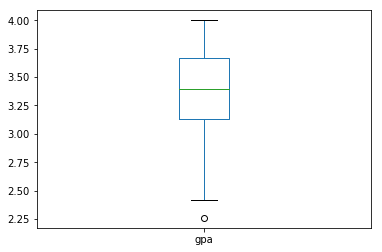

In [16]:
#boxplot 2 
df_raw['gpa'].plot(kind="box")

#### Question 7. What do this plots show?

Answer: 

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122153210>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122304310>]], dtype=object)

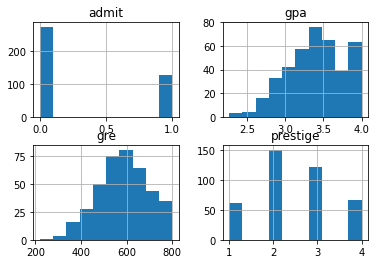

In [27]:
# plot the distribution of each variable 
df_raw.hist()

In [21]:
df_raw.skew()

admit       0.787051
gre        -0.150127
gpa        -0.211765
prestige    0.093663
dtype: float64

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, gpa and gre are negatively skewed.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: It is skewed so you can correct this using log transformation. 

#### Question 11. Which of our variables are potentially colinear? 

In [25]:
# create a correlation matrix for the data
df_raw.corr()

admit       gre       gpa  prestige
admit     1.000000  0.182919  0.175952 -0.241355
gre       0.182919  1.000000  0.382408 -0.124533
gpa       0.175952  0.382408  1.000000 -0.059031
prestige -0.241355 -0.124533 -0.059031  1.000000

#### Question 12. What did you find?

Answer: 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Create dummy variables for the prestige column using get_dummies with 4 levels. Get rid of the prestige column. We are trying to predict the admission rate based on the prestige of the school, and we will have to get rid of the prestige level 1 column to prevent collinearity. Then we can do logistic regression using the statsmodels logit function. The output of this function will show the coefficients, how well they fit, overall fit, and some other statistics that will help describe the model. Then you can look at the confidence interval and determine the relationship between the variables. 

#### Question 14. What is your hypothesis? 

Answer: There will be an association between grad school admission rates and the prestige of undergraduate schools. Specifically, the admission rate will be higher for students who went to more prestigious schools. 

## Knowledge Review Questions

1. What is test error and train error?
2. What are ways to mitigate a situation where you have low train error but high test error?
3. What are some of the parameters you can tweak to get a better fit in ordinary linear regression?
4. What package would you use to explore these parameters easily and find the best model?
5. What is the difference between Lasso and Ridge regression?
    6a. When do you use which?
6. Bonus: Explore alternatives to dropping obervations with missing data

Advanced Bonus:
1. What makes Lasso regression do what it does to the coefficients?
2. How do you deal with multi-colinearity when performing linear regression?
3. What is the "distance" formula in KNN? I.e. how does KNN account for distance to the k neighbours when predicting the class?